Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

%matplotlib inline

## Exercise 5.1

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

<tt>scipy.stats</tt> contains objects that represent analytic distributions

In [2]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [3]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [4]:
dist.mean(), dist.std()

(178.0, 7.7000000000000002)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [5]:
dist.cdf(mu-sigma)

0.15865525393145741

How many people are between 5'10" and 6'1"?

In [10]:
dist.cdf(73 * 2.54) - dist.cdf(70 * 2.54)

0.34274683763147457

## Exercise 5.2

To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters $x_m = 1$ m and $α = 1.7$, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

<tt>scipy.stats.pareto</tt> represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [12]:
alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

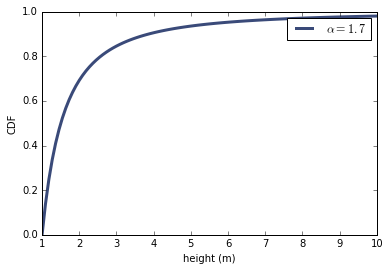

In [13]:
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(xlabel='height (m)', ylabel='CDF')

What is the mean height in Pareto world?

In [16]:
dist.mean()

2.4285714285714288

What fraction of people are shorter than the mean?

In [17]:
dist.cdf(dist.mean())

0.77873969756528805

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [22]:
(1 - dist.cdf(1000)) * 7 * 10**9
dist.sf(1000) * 7 * 10**9

55602.976430479954

How tall do we expect the tallest person to be?  Hint: find the height that yields about 1 person.

In [37]:
(1-dist.cdf(10**((scipy.log10(1/7) -9)/(-alpha)))) * 7 * 10**9
10**((scipy.log10(1/7) -9)/(-alpha))

618349.68115422607

## Exercise 5.3

The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$CDF(x) = 1 − \exp(−(x / λ)^k)$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use random.weibullvariate to generate a sample from a Weibull distribution and use it to test your transformation.

In [65]:
import random
k = 3
lam = 1

/home/punchagan/.virtualenvs/py3/local/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


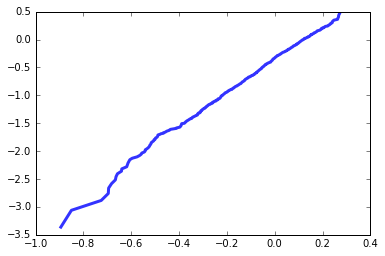

In [66]:
xs = sorted([random.weibullvariate(lam, k) for _ in range(1000)])
import pandas as pd
xs = pd.Series(xs)
ys = [(xs[xs < x]).count()/1000 for x in xs]
ys =  pd.Series(ys)
thinkplot.Plot(scipy.log10(xs), scipy.log10(scipy.log10(1 - ys)))

## Exercise 5.4

For small values of n, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use `random.expovariate` to generate the values.

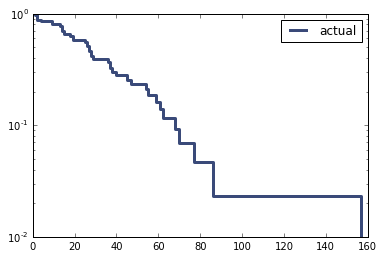

In [67]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(yscale='log')

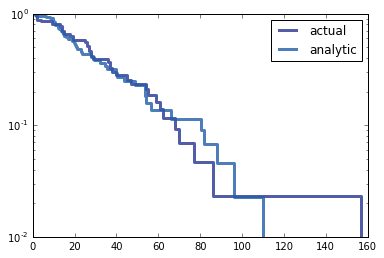

In [73]:
sample = [random.expovariate(1.0/33) for _ in range(44)]
cdf_ = thinkstats2.Cdf(sample, label='analytic')
thinkplot.Cdfs([cdf, cdf_], complement=True)
thinkplot.Config(yscale='log')
          